# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [177]:
# Import the appropriate libraries with aliases
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [178]:
# EDA Question 1A solution below:
north_rep_count = north_df["Rep ID"].nunique()
north_rep_count

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [179]:
# EDA Question 1B solution Below:
south_rep_count = south_df["Rep ID"].nunique()
south_rep_count

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [180]:
# EDA Question 2A solution Below:
north_avg_times_dictionary = {
    'Busy Minutes' : ['mean'],
    'Not Ready Minutes' : ['mean'],
    'Incoming Wait Time' : ['mean'],
    'During Call Wait Time' : ['mean'] }
north_avg_times = north_df.agg(north_avg_times_dictionary)
print(north_avg_times.round(2))

      Busy Minutes  Not Ready Minutes  Incoming Wait Time  \
mean          9.99               1.91                3.05   

      During Call Wait Time  
mean                   2.97  


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [181]:
# EDA Question 2B solution Below:
south_avg_times_dictionary = {
    'Busy Minutes' : ['mean'],
    'Not Ready Minutes' : ['mean'],
    'Incoming Wait Time' : ['mean'],
    'During Call Wait Time' : ['mean'] }
south_avg_times = south_df.agg(south_avg_times_dictionary)
print(south_avg_times.round(2))

      Busy Minutes  Not Ready Minutes  Incoming Wait Time  \
mean         10.05               1.91                 3.0   

      During Call Wait Time  
mean                   3.08  


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [182]:
# EDA Question 3 solution Below:
north_calls_by_time = north_df.groupby("Time Block")["Calls"].sum()
south_calls_by_time = south_df.groupby("Time Block")["Calls"].sum()
combined_total_calls_by_time = north_calls_by_time + south_calls_by_time
combined_total_calls_by_time

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [183]:
# Question 1 solution below
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%
Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


#### Record your answer below:

> Your Answer: There is missing data in the Incoming Wait Time column. I debated on leaving them null or changing the null's to zero. I've decided to  leave them as null. I am doing that because I don't want to change them to 0 and it affect the results being ran on the data. For instance, it would change something like the mean of Incoming Wait Time. That change in the data would cause it to be inaccurate because you'd be calculating a 0 wait time for a call that was not an incoming call to begin with. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [184]:
# Cleaning Question 2 solution below:
north_df["Sale"] = north_df["Sale"].str.rstrip()
north_df["Sale"].unique()

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: There was trailing whitespace for at least one of the YES values in the sale column. I found it by using the .unique() technique. I then used the rstrip() method to remove the trailing whitespace for the whole Sale column in the north_df. When I did that, I updated the column in the original north_df to reflect that change. I ran the .unique() function again to check that it worked. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [185]:
# Cleaning Question 3 solution below:
duplicates_north = north_df[north_df.duplicated()]
display(duplicates_north)
duplicates_south = south_df[south_df.duplicated()]
display(duplicates_south)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


##### Record your answer below:
> Your Answer: There are no duplicates in the two data sets that I found. I ran .duplicated() on both data sets to find any duplicates. I did not find any duplicates in either data set.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [186]:
# Cleaning Question 4 solution below:
north_df = north_df.drop(columns=["Unnamed: 0", "Sale"])
south_df = south_df.drop(columns=["Unnamed: 0", "Sale"])

##### Record your answer below:
> Your Answer: Yes, I believe the columns Unnamed: 0 and Call Purpose are unnecessary. For Unnamed: 0, it's just an index that is added into the dataframe. I don't believe you need an index inside of the dataframe. I also could be wrong, but I think having that will throw an error when trying to combine the datasets because the Unnamed: 0 will have matching records between the two datasets when the rest of that row's records do not match.I also deleted the Sale column as I don't think we need it since we're just measuring the call volume and effectiveness of the reps at handling that volume. I also think Call Purpose is unecessary, however I didn't delete it because it's used later on. I could be wrong but again I think that purpose of the calls is useless when we're measuring the effectiveness of the reps and they're ability to handle call volumes. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [187]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df])
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [188]:
# Manipulation Question solution below:
rep_call_count = df.groupby(["Rep ID", "Branch"])["Calls"].sum().sort_values(ascending=False)
rep_call_count

Rep ID  Branch
Brent   North     37
Eric    South     35
Randy   South     33
Sandy   South     32
Helga   South     31
Lilly   North     30
George  South     29
Kate    South     29
Todd    North     29
Duke    North     29
Karl    South     28
Joe     North     26
Susan   South     26
Josh    South     26
Sharon  South     25
Cam     North     24
Xander  North     24
Amanda  North     23
Andy    North     23
Alice   South     20
Name: Calls, dtype: int64

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 total calls
- South Branch = Eric with 35 total calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [189]:
# Manipulation Question 2 solution below:
total_abandonment_rate = round((df["Abandoned"].sum() / df["Calls"].sum()) * 100, 2)
abandonment_rate_by_branch = round((df.groupby("Branch")["Abandoned"].sum() / df.groupby("Branch")["Calls"].sum()) * 100, 2)
abandonment_rate_df = pd.DataFrame({
    'Abandonment Rate' : abandonment_rate_by_branch
})
abandonment_rate_df.loc["Total"] = [total_abandonment_rate]
abandonment_rate_df

,Abandonment Rate
Branch,
North,2.86
South,1.27
Total,1.97


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? No

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [190]:
# Manipulation Question 3 solution below:
incoming_calls_above_one = df[(df["Incoming or Outgoing"] == "Incoming") & (df["Incoming Wait Time"] <= 2.0)].groupby("Branch")["Calls"].sum()
incoming_calls_sum = df[df["Incoming or Outgoing"] == "Incoming"].groupby("Branch")["Calls"].sum()
call_answer_percentage = round((incoming_calls_above_one / incoming_calls_sum) * 100, 2)
call_answers_df = pd.DataFrame({
    'Total Calls': incoming_calls_sum,
    'Calls Answered in ≤ 2s': incoming_calls_above_one,
    'Answer Percentage': call_answer_percentage
})
call_percentage_total_row = pd.DataFrame ({ 
    'Total Calls': call_answers_df['Total Calls'].sum(),
    'Calls Answered in ≤ 2s': call_answers_df['Calls Answered in ≤ 2s'].sum(),
    'Answer Percentage' : round((call_answers_df['Calls Answered in ≤ 2s'].sum() / call_answers_df['Total Calls'].sum()) * 100, 2)
}, index=['Total'])
calls_answer_df = pd.concat([call_answers_df, call_percentage_total_row])    
calls_answer_df

,Total Calls,Calls Answered in ≤ 2s,Answer Percentage
North,82,33,40.24
South,126,48,38.10
Total,208,81,38.94


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 calls answered within 2.0 seconds
- South Branch = 38.10%, 48 calls answered within 2.0 seconds
- Company Wide = 38.94%, 81 calls answered within 2.0 seconds

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [191]:
# Manipulation Question 4 solution below:
incoming_calls_total = df[df["Incoming or Outgoing"] == "Incoming"].groupby("Branch")["Calls"].sum()
branch_call_answer_speed = round(df.groupby('Branch')["Incoming Wait Time"].sum() / incoming_calls_total, 2)
answer_speed_df = pd.DataFrame({
    "Average Answer Speed" : branch_call_answer_speed
})
answer_speed_df.loc["Total"] = [round(df["Incoming Wait Time"].sum() / incoming_calls_total.sum(), 2)]
answer_speed_df

,Average Answer Speed
Branch,
North,3.05
South,3.00
Total,3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00 
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\johar\AppData\Local\Temp\ipykernel_50568\3565263856.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = round((queue_dict["Abandoned"][i] / queue_dict["Calls"][i]) * 100, 2)


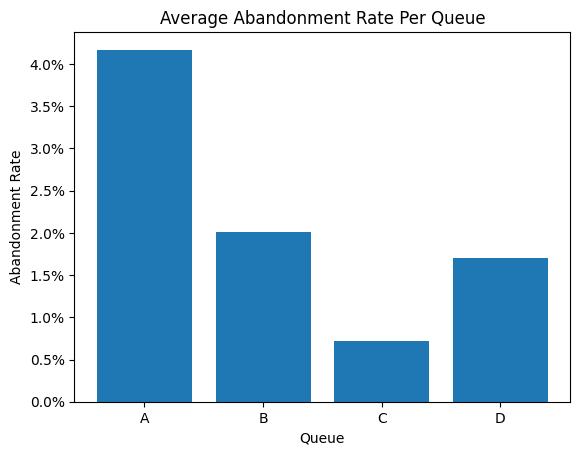

In [192]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sns
from matplotlib import style
import matplotlib.ticker as mtick 
from matplotlib.ticker import PercentFormatter
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = round((queue_dict["Abandoned"][i] / queue_dict["Calls"][i]) * 100, 2)

#Your code below:
plt.bar(abandonment_rates.keys(), abandonment_rates.values())
plt.title("Average Abandonment Rate Per Queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals = 1))

##### Record your answer below:

> Chart style you chose and why: I chose a column chart. I did this because it's a good comparison chart, especially when I have only 4 results to compare

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

,Rep ID,Calls_x,Calls_y,Service Level %,Incoming Wait Time
0,Amanda,3,5,60.000000,2.400000
1,Andy,3,10,30.000000,3.600000
2,Brent,6,8,75.000000,2.125000
3,Cam,5,11,45.454545,2.909091
4,Duke,6,14,42.857143,2.785714
5,Joe,2,10,20.000000,3.600000
6,Lilly,4,12,33.333333,3.083333
7,Todd,2,6,33.333333,3.500000
8,Xander,2,6,33.333333,3.333333


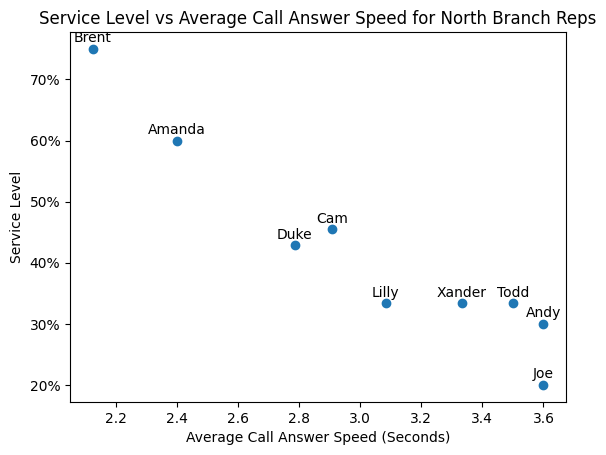

In [223]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

service_level_merged = pd.merge(service_level, north_plt, on = "Rep ID", how = "inner")
#Your Code Here:
plt.scatter(service_level_merged["Incoming Wait Time"], service_level_merged["Service Level %"])
for i, rep_id in enumerate(service_level_merged['Rep ID']):
    plt.annotate(rep_id, 
                 (service_level_merged["Incoming Wait Time"].iloc[i], 
                  service_level_merged["Service Level %"].iloc[i]), 
                 textcoords = "offset points", 
                 xytext = (0, 5), 
                 ha = "center")
plt.title("Service Level vs Average Call Answer Speed for North Branch Reps")
plt.xlabel("Average Call Answer Speed (Seconds)")
plt.ylabel("Service Level")
plt.gca().yaxis.set_major_formatter(PercentFormatter())
(service_level_merged)

,Rep ID,Calls_x,Calls_y,Service Level %,Incoming Wait Time
0,Alice,3,6,50.000000,2.500000
1,Eric,10,18,55.555556,2.611111
2,George,4,13,30.769231,3.153846
3,Helga,3,11,27.272727,3.272727
4,Josh,2,9,22.222222,3.444444
5,Karl,3,9,33.333333,2.888889
6,Kate,3,11,27.272727,3.363636
7,Randy,7,16,43.750000,2.937500
8,Sandy,7,13,53.846154,2.615385
9,Sharon,1,8,12.500000,3.625000


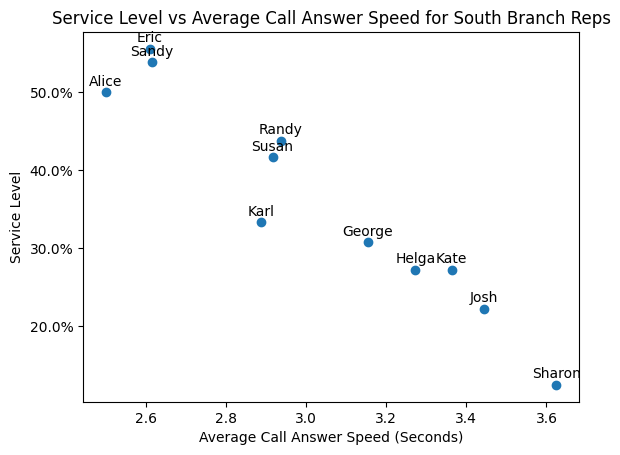

In [228]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

south_merged = pd.merge(service_level, south_plt, on = "Rep ID", how = "inner")
#Your Code Here:
plt.scatter(south_merged["Incoming Wait Time"], south_merged["Service Level %"])
for i, rep_id in enumerate(south_merged['Rep ID']):
    plt.annotate(rep_id, 
                 (south_merged["Incoming Wait Time"].iloc[i], 
                  south_merged["Service Level %"].iloc[i]), 
                 textcoords = "offset points", 
                 xytext = (0, 5), 
                 ha = "center")
plt.title("Service Level vs Average Call Answer Speed for South Branch Reps")
plt.xlabel("Average Call Answer Speed (Seconds)")
plt.ylabel("Service Level")
plt.gca().yaxis.set_major_formatter(PercentFormatter())
(south_merged)

##### Record your answer below:

> Chart style you chose and why: I chose a scatter plot chart to showcase the relationship between service level and call answer speed. It does a good job of highlighting that correlation between the two. I did have a hard time figuring out how to label the data points, but I really wanted to label them with the rep name. After a lot of searching I found the plt.annonate() method. I still don't understand it but I did put it in so that I could have the data points labeled. I also did the same chart for the South Branch just so I could compare the two.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

<class 'pandas.core.series.Series'>
MultiIndex: 5 entries, ('Complaint', 'Incoming') to ('Sales Support', 'Incoming')
Series name: count
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 204.0+ bytes
None


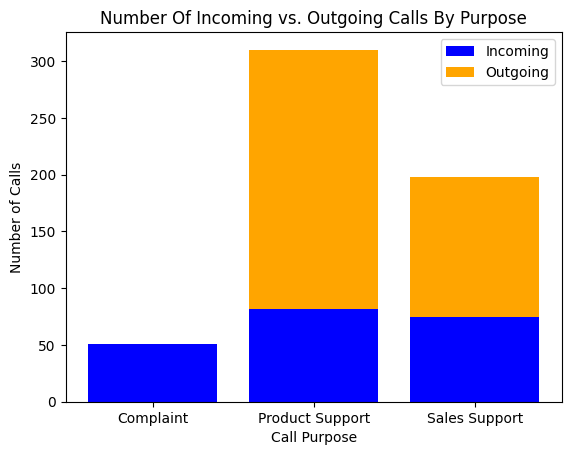

In [222]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts.info())

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

purpose_df = purpose_counts.unstack(fill_value=0)
#Your Code Here:
plt.bar(purpose_df.index, purpose_df["Incoming"], color = "blue", label = "Incoming")
plt.bar(purpose_df.index, purpose_df["Outgoing"], bottom = purpose_df["Incoming"], color = "orange", label = "Outgoing")
plt.title("Number Of Incoming vs. Outgoing Calls By Purpose")
plt.xlabel("Call Purpose")
plt.ylabel("Number of Calls")
plt.legend()

##### Record your answer below:

> Chart style you chose and why: I did a stacked column chart as it's a good chart to showcase the composition aspect of the calls. It breaks down the call purposes and the incoming/outgoing aspect really well. We didn't really get into stacked column charts, so I had to do a lot of outside research. I'm not sure if there was something I was missing but I couldn't get the data to go into a stacked column chart, without converting it to a DataFrame and unstacking it. I did a few different ways to convert it but unstack() was the only method I could get to work with getting the data into the chart. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: Using the KPI's I believe the North Branch is operating at slightly better efficiency. They have a higher percentage of reps operating at service level above 30%. They also have a higher percentage of reps answering within 2.0 seconds. To me those numbers show that per rep, they're more efficient. They do have a higher abandoment rate than the South Branch, but based on the numbers I believe that is likely because they have less reps than South Branch. 

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: I think each branch could benefit from additional reps of course. If I were able to split the 5 reps, then I would put 3 reps in the North Branch and 2 in South Branch. I would do more in the North Branch in order to maximize on the efficiency of the North Branch. They could cut down the abandonment rates. With the higher efficiency and more reps, they should be able to raise the service level % of all their reps and raise the percentage of calls answered in under 2 seconds. With the more additional reps, they should be able to take on more call volume as well. The South Branch could benefit, in that their efficiency numbers should come up with the additional reps to take on more volume. If I had to pick just one then I would pick the North Branch so that you can captilize on the more efficient branch and should get the volume up with less abandoned calls. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: I wish I had more time to interact with the data and answer a few more KPI questions, possibly more visualizations as well. My answers are pretty rough estimates based on the very brief dive into this data. I'd like to know if adding more reps could increase the branches call volume. As far as data goes, I don't feel like there's any more data I want included. I felt like that is the right amount of data info for the brief dive into the data that we're doing. 

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [195]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: